In [2]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.6 MB/s eta 0:00:00


In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import warnings

In [4]:
from google.colab import files
uploaded = files.upload()

Saving stud.csv to stud.csv


In [7]:
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df['Total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['Total_score']/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [10]:
x = df.drop(columns=['Total_score'], axis=1)
y = df['Total_score']

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   average                      1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [11]:
x.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333


In [12]:
y.head(2)

,Total_score
0,218
1,247


In [14]:
##creatte column transformer with 3 types of tranformers

num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns



In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [16]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)


In [17]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='object']


print('we have {} numerical features:{}'.format(len(numeric_features),numeric_features))
print('\nwe have {} categorical features:{}'.format(len(categorical_feature),categorical_feature))

we have 5 numerical features:['math_score', 'reading_score', 'writing_score', 'Total_score', 'average']

we have 5 categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [20]:
X =  preprocessor.fit_transform(x)

In [23]:
X.shape

(1000, 21)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 21), (200, 21), (800,), (200,))

**Create an evaluate function to give all  metrics after the model building**

In [27]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) ##training the model

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(Y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(Y_test , y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')




Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0090
- Mean Absolute Error: 0.8075
- R2 Score: 0.9994
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0557
- Mean Absolute Error: 0.8312
- R2 Score: 0.9994


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0176
- Mean Absolute Error: 0.0143
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0193
- Mean Absolute Error: 0.0147
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.9448
- Mean Absolute Error: 4.6710
- R2 Score: 0.9803
-----------------------

In [30]:


df_results = pd.DataFrame(list(zip(model_list, r2_list)),columns=['Model', 'R2_Score']).sort_values(
               by=['R2_Score'], ascending=False)

print(df_results)


                     Model  R2_Score
0        Linear Regression  1.000000
2                    Ridge  1.000000
1                    Lasso  0.999422
4            Decision Tree  0.997701
6             XGBRegressor  0.997429
5  Random Forest Regressor  0.996397
7    CatBoosting Regressor  0.994960
8       AdaBoost Regressor  0.992764
3    K-Neighbors Regressor  0.966842


In [32]:
lr_model = LinearRegression(fit_intercept=True)
lr_model = lr_model.fit(X_train, Y_train)
y_pred = lr_model.predict(X_test)
score = r2_score(Y_test, y_pred)
print("accuracy of the model is %.2f" %score)

accuracy of the model is 1.00


Text(0, 0.5, 'Predicted')

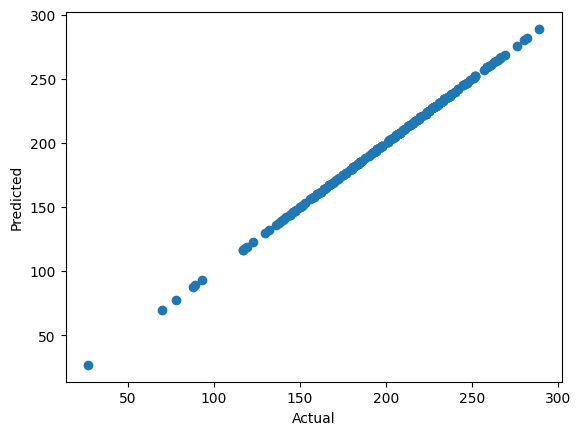

In [33]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='Total_score'>

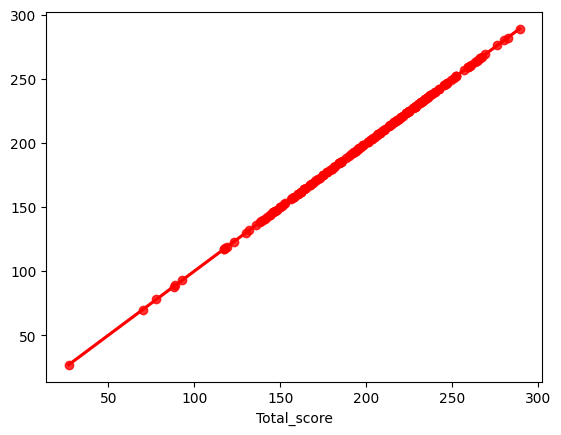

In [34]:
sns.regplot(x=Y_test, y=y_pred, ci=None, color ='red')

In [36]:
pred_df = pd.DataFrame({'Actual Value':Y_test, 'Predicted Value':y_pred, 'Difference':Y_test-y_pred})
pred_df.head(10)

,Actual Value,Predicted Value,Difference
521,261,261.0,0.000000e+00
737,192,192.0,-2.842171e-14
740,225,225.0,0.000000e+00
660,224,224.0,2.842171e-14
411,245,245.0,-2.842171e-14
678,234,234.0,2.842171e-14
626,202,202.0,0.000000e+00
513,177,177.0,-2.842171e-14
859,232,232.0,5.684342e-14
136,146,146.0,-2.842171e-14
